In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Euclidean norm
from scipy.spatial.distance import cdist

## Create data

In [3]:
from sklearn.datasets import make_blobs

In [4]:
# Create Data
k = 5
X, y = make_blobs(n_samples=500, n_features=2, centers=k, shuffle=True, cluster_std=1.6, random_state=101)
# X is samples, y is cluster 

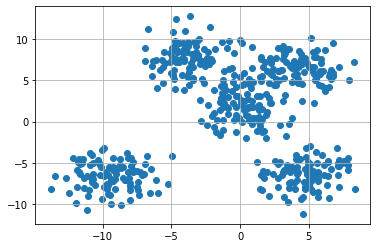

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.grid()

## K-Means Clustering Functions

In [14]:
def compute_cost(X, centers):
    return cdist(X, centers, 'euclidean')

In [6]:
def init_centers(X, k):
    # Random pick k center from data
    return X[np.random.choice(X.shape[0], k, replace=False)]

In [7]:
def assign_labels(X, centers):
    # Compute Euclid norm by using 
    DE = cdist(X, centers, 'euclidean')
    return np.argmin(DE, axis = 1)

In [8]:
def update_centers(X, labels, k):
    # Create new centers
    centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        # Take all elements in cluster i
        Xi = X[labels == i, :]
        # Update centers
        centers[i, :] = np.mean(Xi, axis = 0)
    return centers

In [9]:
def K_means(X, k):
    centers = init_centers(X, k)
    labels = []
    while True:
        # save pre_labels
        labels_old = labels
        # group data to a clusters
        labels = assign_labels(X, centers)
        # Check the change of centers
        if (np.array_equal(labels_old, labels)):
            break
        # Updates centers
        centers = update_centers(X, labels, k)
    return (centers, labels)

In [10]:
(centers, lables) = K_means(X, k)

In [11]:
centers

array([[-3.7397704 ,  7.68336911],
       [-9.45052531, -6.553669  ],
       [ 4.15532306,  6.44095826],
       [ 4.7958295 , -6.33000082],
       [ 0.25539742,  1.65969216]])

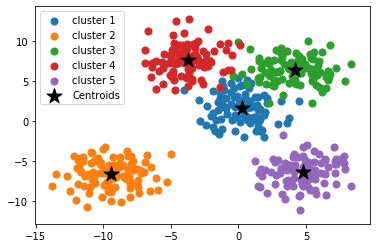

In [12]:
for i in range(k):
    plt.scatter(X[y==i,0], X[y==i,1],
                    s=50,
                    label='cluster '+ str(i+1))

plt.scatter(centers[:,0],centers[:,1],
                    s=250,
                    marker='*',
                    c='black', label = 'Centroids')
plt.legend()

In [16]:
compute_cost(X, centers)

(500, 5)